# Evaluate results on brain data

This notebook is to evaluate and visualize the hyperparameter tuned values.

In [1]:
import numpy as np
import json
from glob import glob
import os
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib import ticker
import plotly
import seaborn as sns

In [2]:
# change this
tune_dir = "/home/rohitrango/ray_results/greedy-tuner-lpba40/"

In [3]:
# load the data
all_results = []
dirs = glob(os.path.join(tune_dir, '*'))
for dir in tqdm(dirs):
    if os.path.isdir(dir):
        result_file = os.path.join(dir, 'result.json')
        with open(result_file, 'r') as f:
            data = f.readlines()
            data = [json.loads(line) for line in data]
            data = data[-1]
            for k, v in data['config'].items():
                data[k] = v
        all_results.append(data)
    else:
        continue

100%|██████████| 643/643 [00:01<00:00, 351.93it/s]


In [4]:
## print some results
# create dataframe
dataframe = pd.DataFrame(all_results)
dataframe = dataframe.sort_values(by=['target_overlap'], ascending=False)
dataframe.reset_index(inplace=True)
# print(dataframe)
print("Best results...")
for i in range(20):
    s = ""
    for key in ['target_overlap', 'grad_sigma', 'warp_sigma', 'lr']:
        s += "{}: {:.04f}, ".format(key, dataframe.loc[i, key])
    print(s)
print("\nWorst results...")
N = len(dataframe)
for i in range(20):
    s = ""
    for key in ['target_overlap', 'grad_sigma', 'warp_sigma', 'lr']:
        s += "{}: {:.04f}, ".format(key, dataframe.loc[N-20+i, key])
    print(s) # print dataframe keys
# print("Printing keys of the dataframe...")
# print(dataframe.keys())

Best results...
target_overlap: 0.7565, grad_sigma: 1.6000, warp_sigma: 0.8571, lr: 1.0000, 
target_overlap: 0.7564, grad_sigma: 1.8000, warp_sigma: 1.0000, lr: 1.0000, 
target_overlap: 0.7564, grad_sigma: 1.4000, warp_sigma: 0.8571, lr: 1.0000, 
target_overlap: 0.7562, grad_sigma: 2.0000, warp_sigma: 1.0000, lr: 1.0000, 
target_overlap: 0.7561, grad_sigma: 1.8000, warp_sigma: 0.8571, lr: 0.8000, 
target_overlap: 0.7561, grad_sigma: 1.8000, warp_sigma: 0.8571, lr: 1.0000, 
target_overlap: 0.7561, grad_sigma: 1.6000, warp_sigma: 1.0000, lr: 1.0000, 
target_overlap: 0.7560, grad_sigma: 1.2000, warp_sigma: 0.7143, lr: 1.0000, 
target_overlap: 0.7560, grad_sigma: 1.0000, warp_sigma: 0.7143, lr: 1.0000, 
target_overlap: 0.7560, grad_sigma: 1.2000, warp_sigma: 0.7143, lr: 0.8000, 
target_overlap: 0.7560, grad_sigma: 2.0000, warp_sigma: 0.8571, lr: 0.8000, 
target_overlap: 0.7559, grad_sigma: 2.2000, warp_sigma: 1.0000, lr: 1.0000, 
target_overlap: 0.7558, grad_sigma: 1.4000, warp_sigma: 0.71

In [5]:
(dataframe['target_overlap'] > 0.75)

0       True
1       True
2       True
3       True
4       True
       ...  
635    False
636    False
637    False
638    False
639    False
Name: target_overlap, Length: 640, dtype: bool

In [6]:
# Visualize second result

tune_dir = "/home/rohitrango/ray_results/lpba40_greedy_geodesic/"

# load the data
all_results = []
dirs = glob(os.path.join(tune_dir, '*'))
for dir in tqdm(dirs):
    if os.path.isdir(dir):
        result_file = os.path.join(dir, 'result.json')
        with open(result_file, 'r') as f:
            data = f.readlines()
            data = [json.loads(line) for line in data]
            if len(data) == 0:
                continue
            data = data[-1]
            for k, v in data['config'].items():
                data[k] = v
        all_results.append(data)
    else:
        continue

100%|██████████| 643/643 [00:00<00:00, 1285.69it/s]


In [7]:
dataframe2 = pd.DataFrame(all_results)
dataframe2 = dataframe2.sort_values(by=['target_overlap'], ascending=False)
dataframe2.reset_index(inplace=True)
# print(dataframe)
print("Best results...")
for i in range(20):
    s = ""
    for key in ['target_overlap', 'grad_sigma', 'warp_sigma', 'lr']:
        s += "{}: {:.04f}, ".format(key, dataframe2.loc[i, key])
    print(s)
print("\nWorst results...")
N = len(dataframe2)
for i in range(20):
    s = ""
    for key in ['target_overlap', 'grad_sigma', 'warp_sigma', 'lr']:
        s += "{}: {:.04f}, ".format(key, dataframe2.loc[N-20+i, key])
    print(s) # print dataframe keys
# print("Printing keys of the dataframe...")
# print(dataframe.keys())

Best results...
target_overlap: 0.7496, grad_sigma: 3.0000, warp_sigma: 0.0000, lr: 0.0002, 
target_overlap: 0.7493, grad_sigma: 2.2000, warp_sigma: 0.0000, lr: 0.0002, 
target_overlap: 0.7479, grad_sigma: 1.6000, warp_sigma: 0.0000, lr: 0.0002, 
target_overlap: 0.7461, grad_sigma: 2.8000, warp_sigma: 0.2857, lr: 0.0002, 
target_overlap: 0.7460, grad_sigma: 2.8000, warp_sigma: 0.1429, lr: 0.0002, 
target_overlap: 0.7460, grad_sigma: 2.8000, warp_sigma: 0.7143, lr: 0.0002, 
target_overlap: 0.7458, grad_sigma: 2.4000, warp_sigma: 0.1429, lr: 0.0002, 
target_overlap: 0.7457, grad_sigma: 2.4000, warp_sigma: 0.2857, lr: 0.0002, 
target_overlap: 0.7457, grad_sigma: 2.8000, warp_sigma: 0.8571, lr: 0.0002, 
target_overlap: 0.7457, grad_sigma: 2.4000, warp_sigma: 0.0000, lr: 0.0002, 
target_overlap: 0.7455, grad_sigma: 2.8000, warp_sigma: 0.4286, lr: 0.0002, 
target_overlap: 0.7454, grad_sigma: 2.8000, warp_sigma: 0.0000, lr: 0.0002, 
target_overlap: 0.7454, grad_sigma: 1.2000, warp_sigma: 0.00

In [9]:
print(len(dataframe['target_overlap']))
print(len(dataframe2['target_overlap']))

640
621


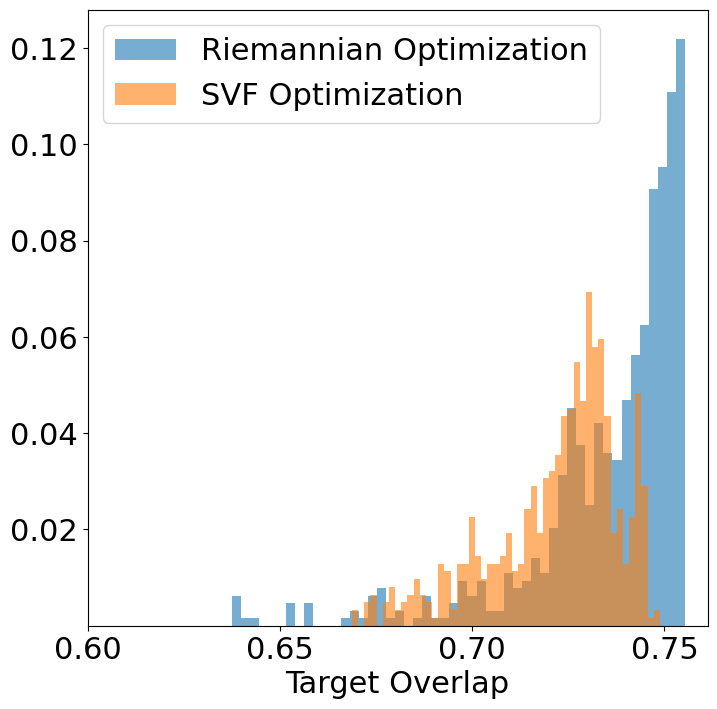

In [17]:
plt.figure(figsize=(8, 8))
# plt.hist(dataframe['target_overlap'], bins=50, alpha=0.6)
# plt.hist(dataframe2['target_overlap'], bins=50, alpha=0.6)
hist_rie, binedges_rie = np.histogram(dataframe['target_overlap'], bins=50)
hist_svf, binedges_svf = np.histogram(dataframe2['target_overlap'], bins=50)
hist_rie = np.array(hist_rie) / np.sum(hist_rie)
hist_svf = np.array(hist_svf) / np.sum(hist_svf)
plt.bar(binedges_rie[:-1], hist_rie, width=binedges_rie[1]-binedges_rie[0], alpha=0.6)
plt.bar(binedges_svf[:-1], hist_svf, width=binedges_svf[1]-binedges_svf[0], alpha=0.6)

plt.legend(['Riemannian Optimization', 'SVF Optimization'], fontsize=22)
# plt.legend(['rgd', 'exp'])
plt.xlabel('Target Overlap', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.yticks(ticks=[0.02, 0.04, 0.06, 0.08, 0.10, 0.12])
plt.xticks(ticks=[0.6, 0.65, 0.7, 0.75])
# plt.ylabel('frequency')
plt.savefig('supp/rie_vs_exp.pdf', bbox_inches='tight')

In [9]:
len(dataframe), len(dataframe2)

(640, 621)

# Visualize the result

First, we put the results in a 3D array

In [10]:
data_dict = {}
for i in range(len(dataframe)):
    row = dataframe.loc[i]
    key = [np.around(row[x], 4) for x in ['lr', 'grad_sigma', 'warp_sigma']]
    data_dict[tuple(key)] = row['target_overlap']

In [11]:
a_values = set()
b_values = set()
c_values = set()
for (a, b, c) in data_dict.keys():
    a_values.add(a)
    b_values.add(b)
    c_values.add(c)

# Sort the indices of a_values, b_values, and c_values in increasing order
a_values = sorted(list(a_values))
b_values = sorted(list(b_values))
c_values = sorted(list(c_values))

# Create the 3D array
num_a = len(a_values)
num_b = len(b_values)
num_c = len(c_values)
array_3d = np.zeros((num_a, num_b, num_c))

# print stats
print("Stats for 3D array")
print(a_values, b_values, c_values)
print(array_3d.shape)

for aid in range(num_a):
    for bid in range(num_b):
        for cid in range(num_c):
            key = (a_values[aid], b_values[bid], c_values[cid])
            array_3d[aid, bid, cid] = data_dict[key]

# The resulting 3D array with sorted indices is ready to be used
# print(array_3d)

Stats for 3D array
[0.2, 0.4, 0.6, 0.8, 1.0] [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0] [0.0, 0.1429, 0.2857, 0.4286, 0.5714, 0.7143, 0.8571, 1.0]
(5, 16, 8)


In [12]:
# save min and max values
minval = array_3d.min()
maxval = array_3d.max()

/home/rohitrango/data/miniconda3/envs/cudants/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":
/home/rohitrango/data/miniconda3/envs/cudants/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


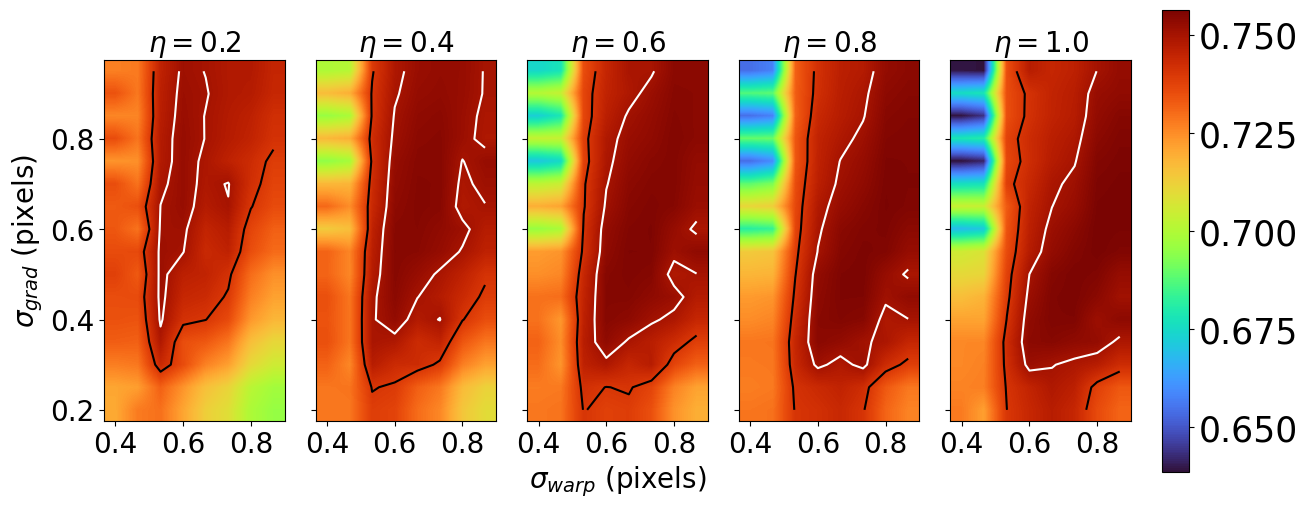

In [16]:
fig, axs = plt.subplots(1, 6, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 0.15]})
for i, ax in enumerate(axs[:-1]):
    im = ax.imshow(array_3d[i], cmap='turbo', vmin=minval, vmax=maxval, interpolation='bilinear', origin='lower')
    ax.contour(array_3d[i], levels=[0.75], colors='white') #, linestyles='dashed')
    ax.contour(array_3d[i], levels=[0.74], colors='black') #, linestyles='dashed')
    #ax.axis('off')
    if i == 0:
        ax.set_ylabel('$\sigma_{grad}$ (pixels)', fontsize=20)
        ax.set_yticklabels(b_values, fontsize=20)
    else:
        ax.set_yticklabels([])
    if i == 2:
        ax.set_xlabel('$\sigma_{warp}$ (pixels)', fontsize=20)
    #ax.set_xticklabels([], rotation=90)
    ax.set_xticklabels(a_values, fontsize=20)
    ax.set_title('$\eta = {}$'.format(a_values[i]), fontsize=20)
    ax.yaxis.set_major_locator(ticker.MaxNLocator(5))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(3))
    

fig.colorbar(im, cax=axs[-1], ticks=ticker.MaxNLocator(nbins=5))
axs[-1].tick_params(labelsize=25)

# plt.suptitle("Hyperparameter grid search on LPBA40 dataset", fontsize=22)
# plt.suptitle("Target overlap on the LPBA40 dataset", fontsize=30)
# # plot label
plt.savefig("hyperparam_lpba.pdf", bbox_inches='tight')

In [14]:
# # plot along other axis
# fig, axs = plt.subplots(4, 4, figsize=(15, 15))
# axs = [axi for ax in axs for axi in ax]
# for i, ax in enumerate(axs):
#     im = ax.imshow(array_3d[:, i], cmap='jet', vmin=minval, vmax=maxval, interpolation='bilinear')
#     ax.set_ylabel('lr')
#     ax.set_yticklabels(b_values)
#     ax.set_xlabel('warp_sigma')
#     ax.set_xticklabels([], rotation=90)
#     ax.set_title('grad_sigma = {}'.format(b_values[i]))
# # fig.colorbar(im, cax=axs[-1])

In [15]:
# # plot along other axis
# fig, axs = plt.subplots(2, 4, figsize=(12, 4))
# axs = [axi for ax in axs for axi in ax]
# for i, ax in enumerate(axs):
#     im = ax.imshow(array_3d[:, :, i], cmap='jet', vmin=minval, vmax=maxval, interpolation='bilinear')
#     if i%4 == 0:
#         ax.set_ylabel('lr')
#     ax.set_yticklabels(b_values)
#     ax.set_xlabel('grad_sigma')
#     ax.set_xticklabels([], rotation=90)
#     ax.set_title('warp_sigma = {}'.format(c_values[i]))

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Evaluate on EMPIRE 10 dataset

Same script as before, but we fixed the learning rate here.

In [17]:
import numpy as np
import json
from glob import glob
import os
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
import plotly
import seaborn as sns

In [18]:
# change this
tune_dir = "/home/rohitrango/ray_results/empire10_greedy/"
# tune_dir = '/home/rohitrango/ray_results/rnr_exm_mousebrain/'

In [19]:
# load the data
all_results = []
dirs = glob(os.path.join(tune_dir, '*'))
for dir in tqdm(dirs):
    if os.path.isdir(dir):
        result_file = os.path.join(dir, 'result.json')
        with open(result_file, 'r') as f:
            data = f.readlines()
            data = [json.loads(line) for line in data]
            try:
                data = data[-1]
                for k, v in data['config'].items():
                    data[k] = v
                all_results.append(data)
            except:
                print(result_file)
    else:
        continue

100%|██████████| 459/459 [00:00<00:00, 3360.39it/s]


In [20]:
## print some results
# create dataframe
dataframe = pd.DataFrame(all_results)
dataframe = dataframe.sort_values(by=['dice'], ascending=False)
dataframe.reset_index(inplace=True)
# print(dataframe)
print("Best results...")
for i in range(20):
    s = ""
    for key in ['dice', 'CC', 'badjacdet', 'grad_sigma', 'warp_sigma']:
        s += "{}: {:.04f}, ".format(key, dataframe.loc[i, key])
    print(s)
print("\nWorst results...")
N = len(dataframe)
for i in range(20):
    s = ""
    for key in ['dice', 'CC', 'badjacdet', 'grad_sigma', 'warp_sigma']:
        s += "{}: {:.04f}, ".format(key, dataframe.loc[N-20+i, key])
    print(s)# print dataframe keys

Best results...
dice: 0.9819, CC: 2.8694, badjacdet: 0.0000, grad_sigma: 4.0000, warp_sigma: 0.4000, 
dice: 0.9817, CC: 2.7690, badjacdet: 0.0000, grad_sigma: 4.5000, warp_sigma: 0.4000, 
dice: 0.9815, CC: 2.6664, badjacdet: 0.0000, grad_sigma: 5.0000, warp_sigma: 0.4000, 
dice: 0.9814, CC: 2.9190, badjacdet: 0.0000, grad_sigma: 3.5000, warp_sigma: 0.4000, 
dice: 0.9813, CC: 2.6359, badjacdet: 0.0000, grad_sigma: 5.5000, warp_sigma: 0.4000, 
dice: 0.9812, CC: 2.7196, badjacdet: 0.0010, grad_sigma: 2.0000, warp_sigma: 0.2000, 
dice: 0.9810, CC: 2.3833, badjacdet: 0.0005, grad_sigma: 3.5000, warp_sigma: 0.2000, 
dice: 0.9810, CC: 1.9974, badjacdet: 0.0006, grad_sigma: 4.0000, warp_sigma: 0.2000, 
dice: 0.9810, CC: 2.8740, badjacdet: 0.0000, grad_sigma: 6.0000, warp_sigma: 0.4000, 
dice: 0.9810, CC: 1.6976, badjacdet: 0.0009, grad_sigma: 4.5000, warp_sigma: 0.2000, 
dice: 0.9808, CC: 2.7056, badjacdet: 0.0000, grad_sigma: 6.5000, warp_sigma: 0.4000, 
dice: 0.9807, CC: 2.6240, badjacdet: 0

In [21]:
# sort by CC
df_cc = pd.DataFrame(all_results)
df_cc = df_cc.sort_values(by=['CC'], ascending=False)
df_cc.reset_index(inplace=True)
# print(dataframe)
print("Best results...")
for i in range(20):
    s = ""
    for key in ['dice', 'CC', 'badjacdet', 'grad_sigma', 'warp_sigma']:
        s += "{}: {:.04f}, ".format(key, df_cc.loc[i, key])
    print(s)

Best results...
dice: 0.9537, CC: 3.6325, badjacdet: 0.0000, grad_sigma: 1.0000, warp_sigma: 1.0000, 
dice: 0.9449, CC: 3.6227, badjacdet: 0.0000, grad_sigma: 1.0000, warp_sigma: 1.4000, 
dice: 0.9425, CC: 3.5890, badjacdet: 0.0000, grad_sigma: 2.0000, warp_sigma: 2.2000, 
dice: 0.9509, CC: 3.5462, badjacdet: 0.0000, grad_sigma: 1.0000, warp_sigma: 1.2000, 
dice: 0.9544, CC: 3.5235, badjacdet: 0.0000, grad_sigma: 2.5000, warp_sigma: 1.6000, 
dice: 0.9649, CC: 3.4911, badjacdet: 0.0000, grad_sigma: 1.0000, warp_sigma: 0.6000, 
dice: 0.9539, CC: 3.4843, badjacdet: 0.0000, grad_sigma: 2.0000, warp_sigma: 1.4000, 
dice: 0.9591, CC: 3.4728, badjacdet: 0.0000, grad_sigma: 1.5000, warp_sigma: 1.0000, 
dice: 0.9513, CC: 3.4651, badjacdet: 0.0000, grad_sigma: 2.0000, warp_sigma: 1.6000, 
dice: 0.9580, CC: 3.4561, badjacdet: 0.0000, grad_sigma: 1.0000, warp_sigma: 0.8000, 
dice: 0.9483, CC: 3.4490, badjacdet: 0.0000, grad_sigma: 3.0000, warp_sigma: 2.2000, 
dice: 0.9499, CC: 3.4484, badjacdet: 0

# Visualize the result

First, we put the results in a 3D array

In [22]:
data_dict = {}
for i in range(len(dataframe)):
    row = dataframe.loc[i]
    key = [np.around(row[x], 4) for x in ['grad_sigma', 'warp_sigma']]
    data_dict[tuple(key)] = row['dice'], row['CC'], row['badjacdet']

In [23]:
a_values = set()
b_values = set()
for (a, b) in data_dict.keys():
    a_values.add(a)
    b_values.add(b)

# Sort the indices of a_values, b_values, and c_values in increasing order
a_values = sorted(list(a_values))
b_values = sorted(list(b_values))

# Create the 3D array
num_a = len(a_values)
num_b = len(b_values)
array_3d = np.zeros((num_a, num_b, 3))
modified = np.zeros((num_a, num_b, ))

# print stats
print("Stats for 3D array")
print(a_values, len(a_values))
print(b_values, len(b_values))
# print(a_values, b_values)

for aid in range(num_a):
    for bid in range(num_b):
        key = (a_values[aid], b_values[bid])
        array_3d[aid, bid] = data_dict[key]
        modified[aid, bid] = data_dict[key][0] > 0.9

# The resulting 3D array with sorted indices is ready to be used
# print(array_3d)
## data imputation
y, x = np.where(modified == 0)
print(y.shape)
array_3d[y, x] = 0.5*(array_3d[y, x-1] + array_3d[y, x+1])

Stats for 3D array
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0] 19
[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8] 24
(13,)


In [24]:
len(a_values), len(b_values), len(data_dict.keys())

(19, 24, 456)

In [25]:
# save min and max values
minval = array_3d.min(0).min(0)
maxval = array_3d.max(0).max(0)
print(minval, maxval)

[0.91711939 0.94333522 0.        ] [0.98187789 3.6325011  0.00964812]


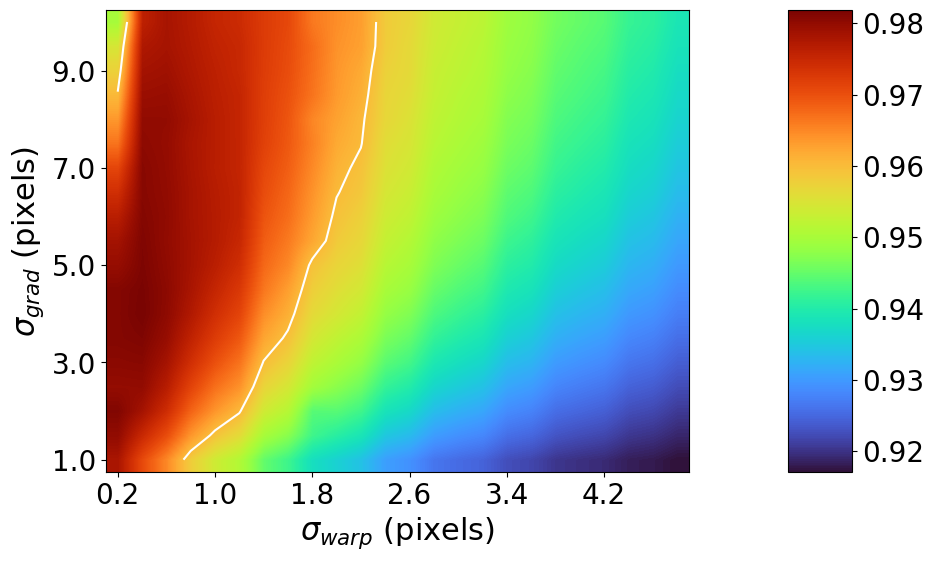

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [1, 0.1]})
ax, cmap_ax = axs
im = ax.imshow(array_3d[..., 0], cmap='turbo', interpolation='bilinear', origin='lower')
ax.contour(array_3d[..., 0], levels=[0.96], colors='white') #, linestyles='dashed'
ax.set_ylabel('$\sigma_{grad}$ (pixels)', fontsize=22)
ax.set_yticks(range(0, len(a_values), 2)); ax.set_yticklabels(a_values[::2], fontsize=20)
ax.set_xlabel('$\sigma_{warp}$ (pixels)', fontsize=22)
ax.set_xticks(range(0, len(b_values), 2)); ax.set_xticklabels(b_values[::2], fontsize=20)
ax.yaxis.set_major_locator(ticker.MaxNLocator(6))
ax.xaxis.set_major_locator(ticker.MaxNLocator(6))
fig.colorbar(im, cax=cmap_ax, ticks=ticker.MaxNLocator(nbins=8))
# ax.set_title('Dice score', fontsize=22)
# fig.suptitle('Dice Score on the EMPIRE10 dataset', fontsize=25)
# fig.suptitle('Hyperparameter grid search on EMPIRE10 challenge (Dice Score)', fontsize=16)
cmap_ax.tick_params(labelsize=20)
plt.savefig("hyperparam_empire.pdf", bbox_inches='tight')

Text(0.5, 1.0, 'Cross correlation')

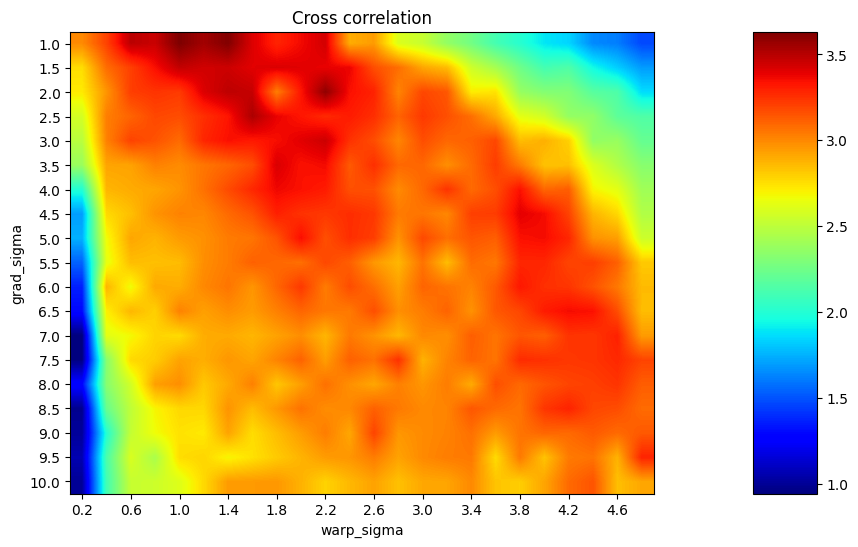

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [1, 0.1]})
ax, cmap_ax = axs
im = ax.imshow(array_3d[..., 1], cmap='jet', interpolation='bilinear')
ax.set_ylabel('grad_sigma')
ax.set_yticks(range(len(a_values))); ax.set_yticklabels(a_values)
ax.set_xlabel('warp_sigma')
ax.set_xticks(range(0, len(b_values), 2)); ax.set_xticklabels(b_values[::2])
fig.colorbar(im, cax=cmap_ax)
ax.set_title('Cross correlation')

Text(0.5, 1.0, '%(detjac) < 0')

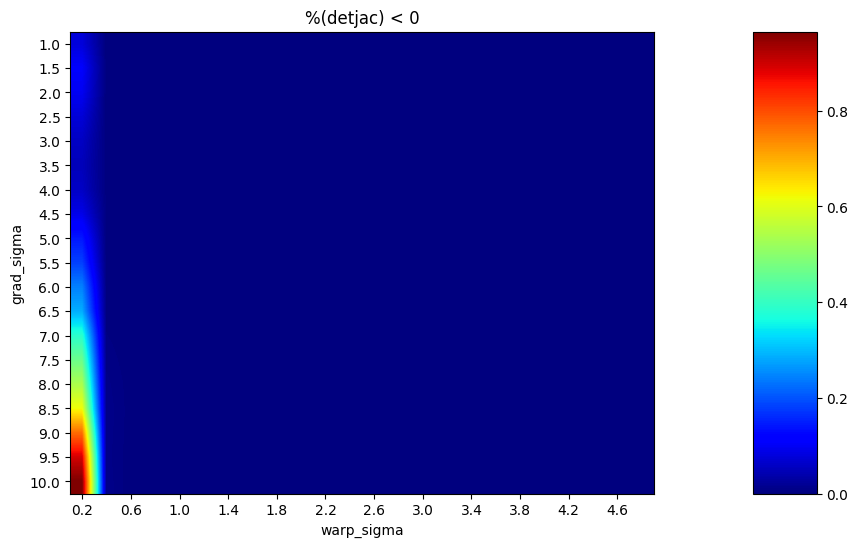

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [1, 0.1]})
ax, cmap_ax = axs
im = ax.imshow(array_3d[..., 2]*100, cmap='jet', interpolation='bilinear')
ax.set_ylabel('grad_sigma')
ax.set_yticks(range(len(a_values))); ax.set_yticklabels(a_values)
ax.set_xlabel('warp_sigma')
ax.set_xticks(range(0, len(b_values), 2)); ax.set_xticklabels(b_values[::2])
fig.colorbar(im, cax=cmap_ax)
ax.set_title('%(detjac) < 0')

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Evaluate on RnR-ExM dataset

Same script as before.

In [12]:
# load the data
tune_dir = '/home/rohitrango/ray_results/rnr_exm_mousebrain/'

all_results = []
dirs = glob(os.path.join(tune_dir, '*'))
for dir in tqdm(dirs):
    if os.path.isdir(dir):
        result_file = os.path.join(dir, 'result.json')
        with open(result_file, 'r') as f:
            data = f.readlines()
            data = [json.loads(line) for line in data]
            try:
                data = data[-1]
                for k, v in data['config'].items():
                    data[k] = v
                all_results.append(data)
            except:
                print(result_file)
    else:
        continue

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1203/1203 [00:00<00:00, 15926.58it/s]

/home/rohitrango/ray_results/rnr_exm_mousebrain/run_registration_val_03103_00558_558_grad_sigma=7.8000,warp_sigma=2.8000_2023-08-07_19-44-21/result.json
/home/rohitrango/ray_results/rnr_exm_mousebrain/run_registration_val_03103_00959_959_grad_sigma=8.0000,warp_sigma=4.8000_2023-08-07_22-52-11/result.json
/home/rohitrango/ray_results/rnr_exm_mousebrain/run_registration_val_03103_00598_598_grad_sigma=7.8000,warp_sigma=3.0000_2023-08-07_20-02-03/result.json
/home/rohitrango/ray_results/rnr_exm_mousebrain/run_registration_val_03103_00319_319_grad_sigma=8.0000,warp_sigma=1.6000_2023-08-07_18-02-40/result.json
/home/rohitrango/ray_results/rnr_exm_mousebrain/run_registration_val_03103_00678_678_grad_sigma=7.8000,warp_sigma=3.4000_2023-08-07_20-38-49/result.json
/home/rohitrango/ray_results/rnr_exm_mousebrain/run_registration_val_03103_00239_239_grad_sigma=8.0000,warp_sigma=1.2000_2023-08-07_17-47-33/result.json
/home/rohitrango/ray_results/rnr_exm_mousebrain/run_registration_val_03103_00559_5

In [13]:
## print some results
# create dataframe
dataframe = pd.DataFrame(all_results)
dataframe = dataframe.sort_values(by=['dice'], ascending=False)
dataframe.reset_index(inplace=True)
# print(dataframe)
print("Best results...")
for i in range(20):
    s = ""
    for key in ['dice', 'cc', 'grad_sigma', 'warp_sigma']:
        s += "{}: {:.04f}, ".format(key, dataframe.loc[i, key])
    print(s)
print("\nWorst results...")
N = len(dataframe)
for i in range(20):
    s = ""
    for key in ['dice', 'cc', 'grad_sigma', 'warp_sigma']:
        s += "{}: {:.04f}, ".format(key, dataframe.loc[N-20+i, key])
    print(s)# print dataframe keys

Best results...
dice: 0.9484, cc: 0.0748, grad_sigma: 6.8000, warp_sigma: 0.2000, 
dice: 0.9483, cc: 0.0738, grad_sigma: 7.4000, warp_sigma: 0.2000, 
dice: 0.9472, cc: 0.0753, grad_sigma: 6.4000, warp_sigma: 0.2000, 
dice: 0.9467, cc: 0.0745, grad_sigma: 6.6000, warp_sigma: 0.2000, 
dice: 0.9467, cc: 0.0731, grad_sigma: 7.6000, warp_sigma: 0.2000, 
dice: 0.9464, cc: 0.0740, grad_sigma: 7.0000, warp_sigma: 0.2000, 
dice: 0.9459, cc: 0.0747, grad_sigma: 6.2000, warp_sigma: 0.2000, 
dice: 0.9454, cc: 0.0733, grad_sigma: 7.2000, warp_sigma: 0.2000, 
dice: 0.9440, cc: 0.0753, grad_sigma: 7.6000, warp_sigma: 0.4000, 
dice: 0.9438, cc: 0.0761, grad_sigma: 5.6000, warp_sigma: 0.2000, 
dice: 0.9437, cc: 0.0769, grad_sigma: 6.4000, warp_sigma: 0.4000, 
dice: 0.9437, cc: 0.0755, grad_sigma: 7.2000, warp_sigma: 0.4000, 
dice: 0.9436, cc: 0.0765, grad_sigma: 5.2000, warp_sigma: 0.2000, 
dice: 0.9434, cc: 0.0791, grad_sigma: 4.8000, warp_sigma: 0.2000, 
dice: 0.9430, cc: 0.0766, grad_sigma: 6.2000, 

## Note

Using cross-correlation to choose best parameters is not a good strategy.

In [16]:
data_dict = {}
for i in range(len(dataframe)):
    row = dataframe.loc[i]
    key = [np.around(row[x], 4) for x in ['grad_sigma', 'warp_sigma']]
    data_dict[tuple(key)] = row['dice'], row['cc']

In [19]:
a_values = set()
b_values = set()
for (a, b) in data_dict.keys():
    a_values.add(a)
    b_values.add(b)

# Sort the indices of a_values, b_values, and c_values in increasing order
a_values = sorted(list(a_values))
b_values = sorted(list(b_values))

# Create the 3D array
num_a = len(a_values)
num_b = len(b_values)
array_3d = np.zeros((num_a, num_b, 2))

# print stats
print("Stats for 3D array")
print(a_values, len(a_values))
print(b_values, len(b_values))
# print(a_values, b_values)
print(array_3d.shape)

for aid in range(num_a):
    for bid in range(num_b):
        key = (a_values[aid], b_values[bid])
        array_3d[aid, bid] = data_dict[key]

# The resulting 3D array with sorted indices is ready to be used
# print(array_3d)

Stats for 3D array
[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6] 38
[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0] 30
(38, 30, 2)


Text(0.5, 1.0, 'Dice score')

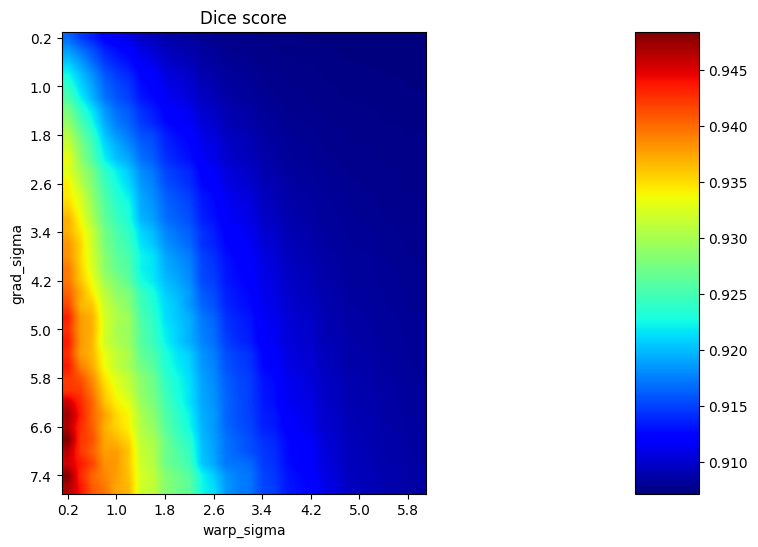

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [1, 0.1]})
ax, cmap_ax = axs
im = ax.imshow(array_3d[..., 0], cmap='jet', interpolation='bilinear')
ax.set_ylabel('grad_sigma')
ax.set_yticks(range(0, len(a_values), 4)); ax.set_yticklabels(a_values[::4])
ax.set_xlabel('warp_sigma')
ax.set_xticks(range(0, len(b_values), 4)); ax.set_xticklabels(b_values[::4])
fig.colorbar(im, cax=cmap_ax)
ax.set_title('Dice score')

Text(0.5, 1.0, 'Cross correlation')

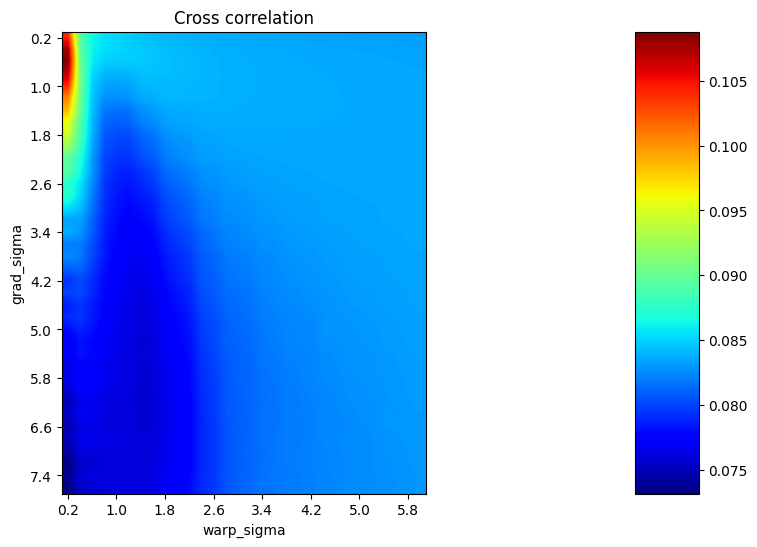

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [1, 0.1]})
ax, cmap_ax = axs
im = ax.imshow(array_3d[..., 1], cmap='jet', interpolation='bilinear')
ax.set_ylabel('grad_sigma')
ax.set_yticks(range(0, len(a_values), 4)); ax.set_yticklabels(a_values[::4])
ax.set_xlabel('warp_sigma')
ax.set_xticks(range(0, len(b_values), 4)); ax.set_xticklabels(b_values[::4])
fig.colorbar(im, cax=cmap_ax)
ax.set_title('Cross correlation')